In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the Handwritten digit dataset

In [6]:
from keras.datasets import mnist

In [7]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [8]:
xtrain.shape

(60000, 28, 28)

In [9]:
xtest.shape

(10000, 28, 28)

In [10]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
ytrain[0]

5

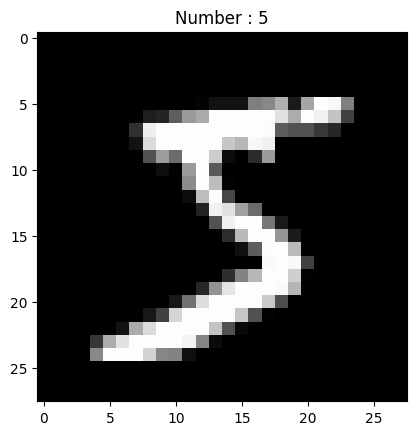

In [12]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')
plt.title(f'Number : {ytrain[0]}')
plt.show()

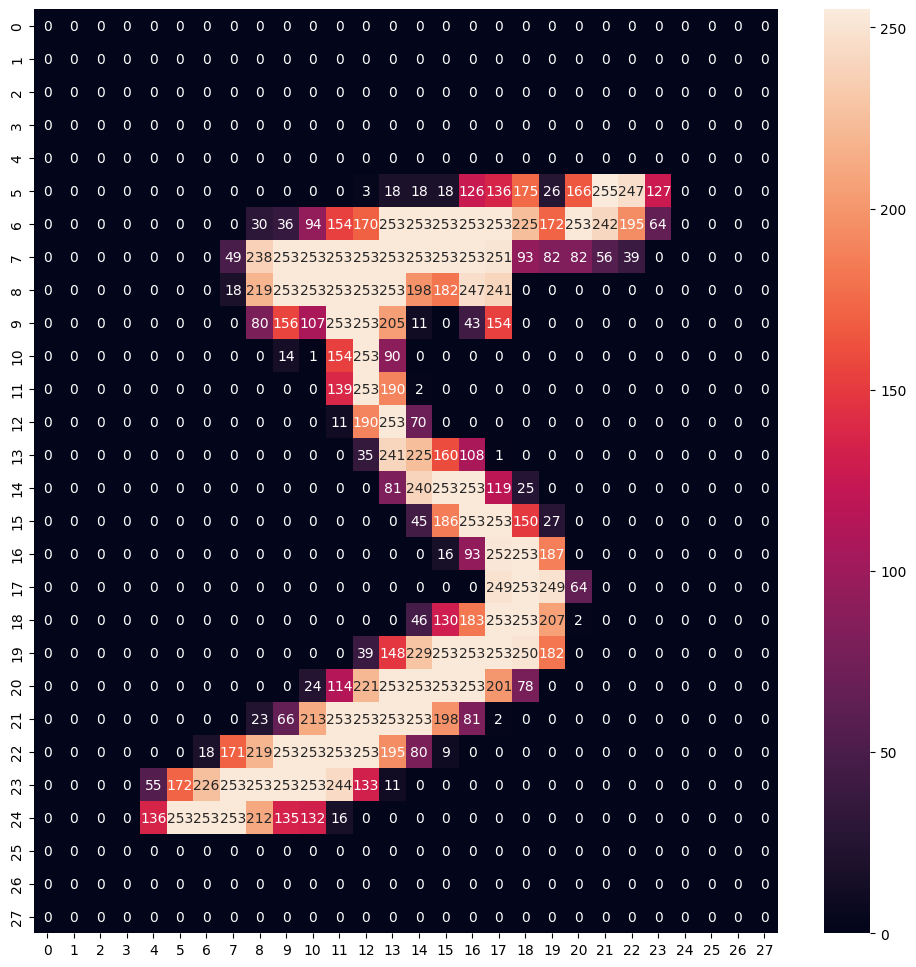

In [13]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(xtrain[0], annot=True, fmt='d')
plt.show()

#### Seeing top 9 results from xtrain

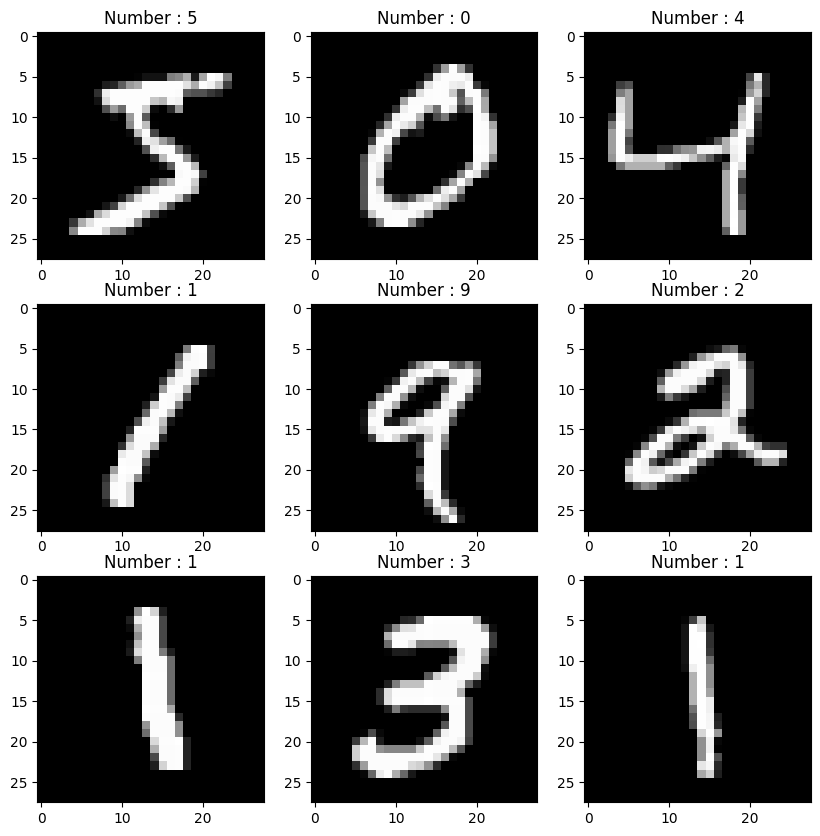

In [14]:
plt.figure(figsize=(10,10))
x = 1
for i in range(9):
    plt.subplot(3,3,x)
    x = x+1
    plt.imshow(xtrain[i], cmap='gray')
    plt.title(f'Number : {ytrain[i]}')
plt.show()


#### Preprocessing images

In [15]:
xtrain_scl = xtrain/255 
xtest_scl = xtest/255

In [16]:
import numpy as np 
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Convert ytrian and ytest to categorical

In [17]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [18]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### Building the CNN
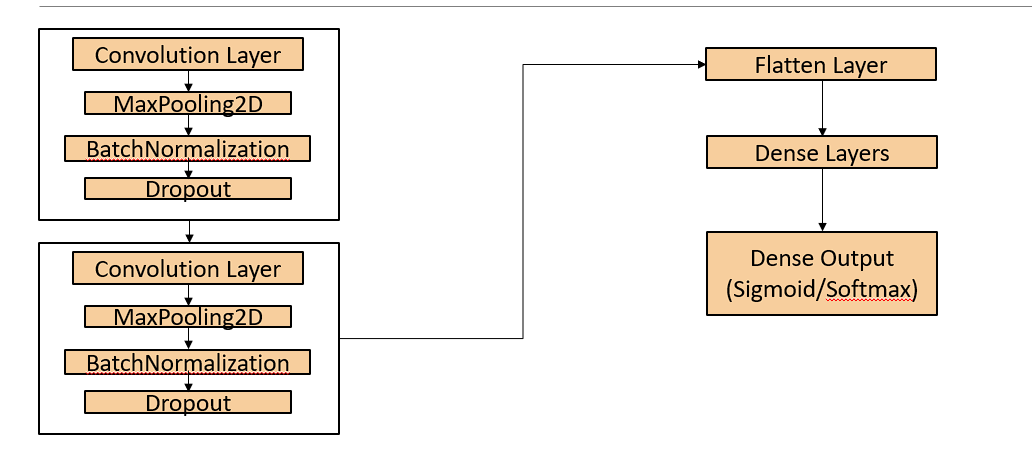

### Batch Normalization Layer will act like standard scaler to each image

In [20]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense 

In [21]:
model = Sequential()

# Create Convolutional Layer 1
model.add(Convolution2D(16, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Create convolution layer 2
model.add(Convolution2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Create a flatten Layer
model.add(Flatten())

# Create a Dense Layer
model.add(Dense(256, activation='relu'))

# Create an output layer 
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0

### Compile the model

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### fit the model

In [24]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=5)

Epoch 1/5


1500/1500 [==============================] - 33s 17ms/step - loss: 0.1334 - accuracy: 0.9580 - val_loss: 0.0532 - val_accuracy: 0.9847
Epoch 2/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0527 - accuracy: 0.9833 - val_loss: 0.0509 - val_accuracy: 0.9855
Epoch 3/5
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0406 - accuracy: 0.9870 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 4/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0321 - accuracy: 0.9894 - val_loss: 0.0407 - val_accuracy: 0.9888
Epoch 5/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0266 - accuracy: 0.9909 - val_loss: 0.0397 - val_accuracy: 0.9889


### Plot the learning curve

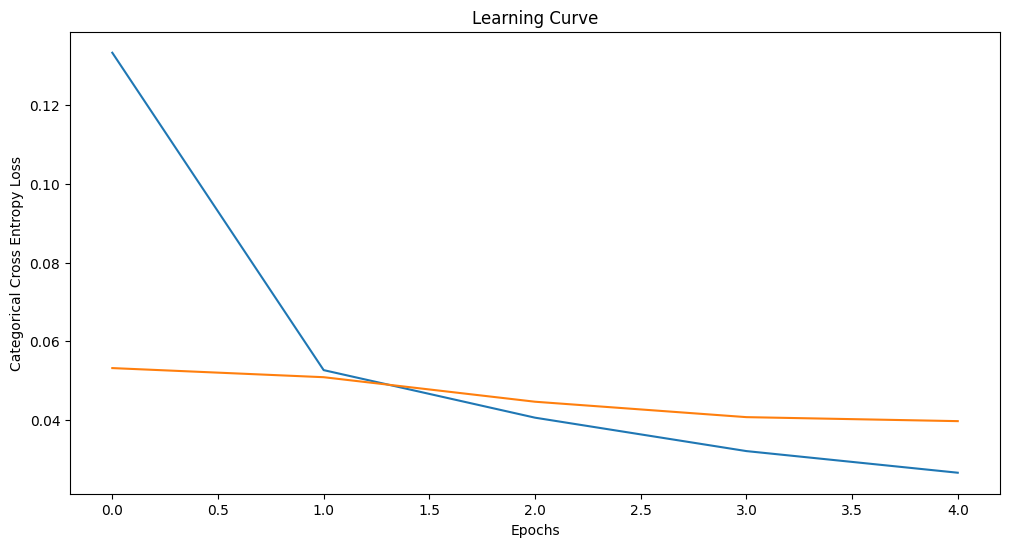

In [25]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross Entropy Loss')
plt.title('Learning Curve')
plt.show()

### Evaluate model in train and test

In [26]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.0169 - accuracy: 0.9947


[0.01685827597975731, 0.9947333335876465]

### predicting the train test results

In [27]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 2s 5ms/step


In [28]:
yprob_tr[0:5]

array([[7.6836870e-10, 4.7881258e-08, 3.3763456e-10, 1.4056581e-04,
        6.6742957e-12, 9.9985898e-01, 2.8130080e-07, 1.1880412e-08,
        2.2710967e-08, 1.2219948e-07],
       [9.9999940e-01, 1.3600095e-13, 4.5487531e-07, 3.4702328e-12,
        9.9395830e-12, 3.4189597e-13, 3.1375096e-09, 1.1927938e-10,
        3.2623490e-10, 1.2131818e-07],
       [3.8209089e-15, 2.1079336e-08, 1.7293338e-09, 1.8611709e-12,
        9.9999988e-01, 1.2819270e-13, 6.4178406e-14, 7.4804385e-10,
        2.6322122e-12, 5.2266572e-08],
       [1.8482404e-09, 9.9999988e-01, 1.1078391e-11, 1.8651909e-15,
        7.7925719e-08, 3.2000867e-14, 1.4332198e-09, 5.1635729e-10,
        2.3515742e-08, 2.9301183e-11],
       [3.1947719e-11, 1.1211771e-08, 1.2898491e-08, 5.8642399e-07,
        1.3631698e-06, 4.3734083e-09, 6.4933153e-14, 1.9519152e-06,
        5.6696916e-07, 9.9999559e-01]], dtype=float32)

### predicting numbers

In [29]:
ypred_tr = np.argmax(yprob_tr, axis=1)
ypred_ts = np.argmax(yprob_ts, axis=1)

In [30]:
ypred_tr[0:5]

array([5, 0, 4, 1, 9], dtype=int64)

In [31]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
ypred_ts[0:5]

array([7, 2, 1, 0, 4], dtype=int64)

In [33]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Create a confusion matrix

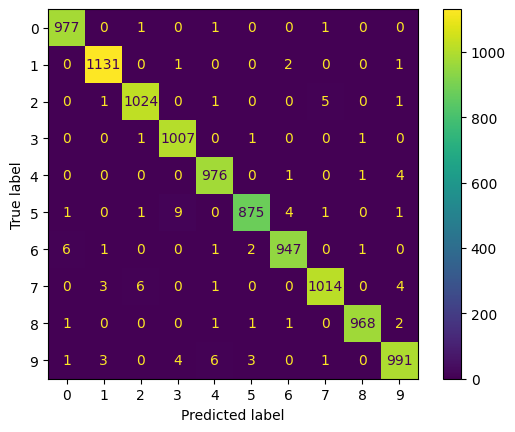

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

### print classification report

In [35]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Saving model for future use

In [36]:
model.save('HandwrittenModel.keras')

### Loading the model

In [37]:
from keras.models import load_model

In [38]:
nn = load_model('HandwrittenModel.keras')

In [39]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 16)        64        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 13, 13, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0